In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\ALZAID SHAIKH\Downloads\Customer-Churn-analysis-main\Customer-Churn-analysis-main\Customer Churn.csv")
df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replace blank with 0 as tenure is 0 and no total charges are recorded

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [39]:
df["customerID"].duplicated().sum()

0

# Here we have converted 0 and 1 values for senior_citizen to yes/No to make is easier to understand

In [45]:
def conv(Value):
    if Value == 1:
        return "yes"
    else:
        return "No"
    
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)


In [50]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


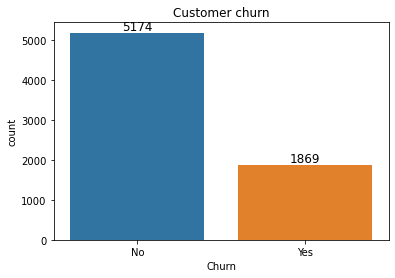

In [130]:
ax = sns.countplot(x = 'Churn',data=df)
plt.title('Customer churn')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

In [ ]:
gb = df.groupby("Churn").agg(Count =('Churn','count'))
gb

,Count
Churn,
No,5174
Yes,1869


# Here we can see 73.5% customers are still with  services and 26.5 % customers have churn out 

<function matplotlib.pyplot.show(*args, **kw)>

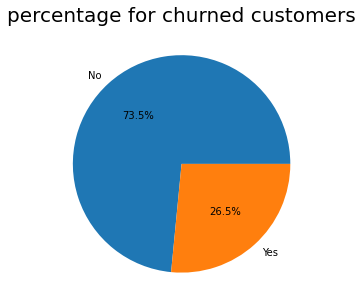

In [135]:
plt.figure(figsize=(5,5))
gb = df.groupby("Churn").agg(Count=('Churn', 'count')).reset_index()
plt.pie(gb['Count'], labels=gb['Churn'], autopct='%1.1f%%')
plt.title('percentage for churned customers', fontsize = 20)
plt.show

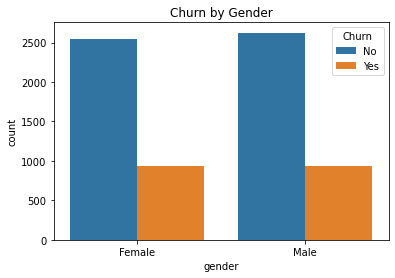

In [ ]:
sns.countplot(df["gender"],data=df,hue="Churn")
plt.title("Churn by gender")
plt.show()

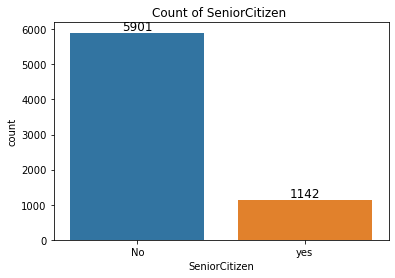

In [157]:
ax = sns.countplot(df["SeniorCitizen"],data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
plt.title("Count of SeniorCitizen ")
plt.show()

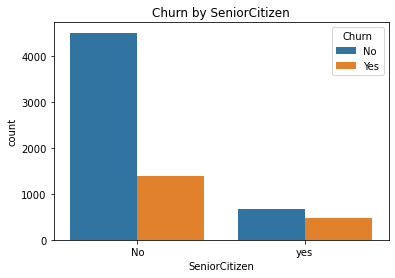

In [158]:
sns.countplot(df["SeniorCitizen"],data=df,hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

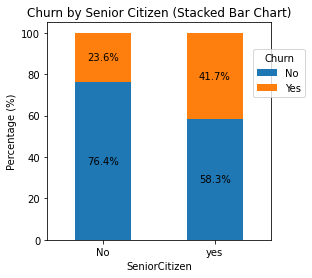

In [164]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

# Compargtive  a greater percentage of the people in senior citizen have churned 

<BarContainer object of 50 artists>

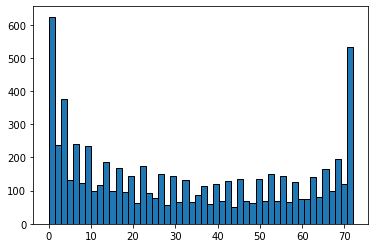

In [265]:
counts, bins = np.histogram(df["tenure"], bins=50)
# Plot with plt.bar for better separation
plt.bar(bins[:-1], counts, width=np.diff(bins), edgecolor="black", align="edge")

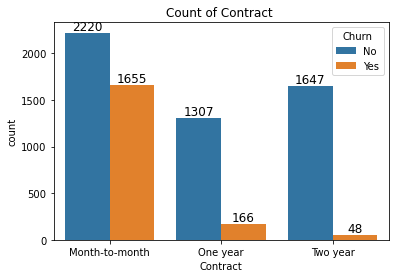

In [267]:
ax = sns.countplot(df["Contract"],data=df,hue='Churn')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
plt.title("Count of Contract ")
plt.show()

# people who have month to month contract are likely to churn then  form those who have 1 or 2 years of contract 

In [269]:
df.columns.values 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

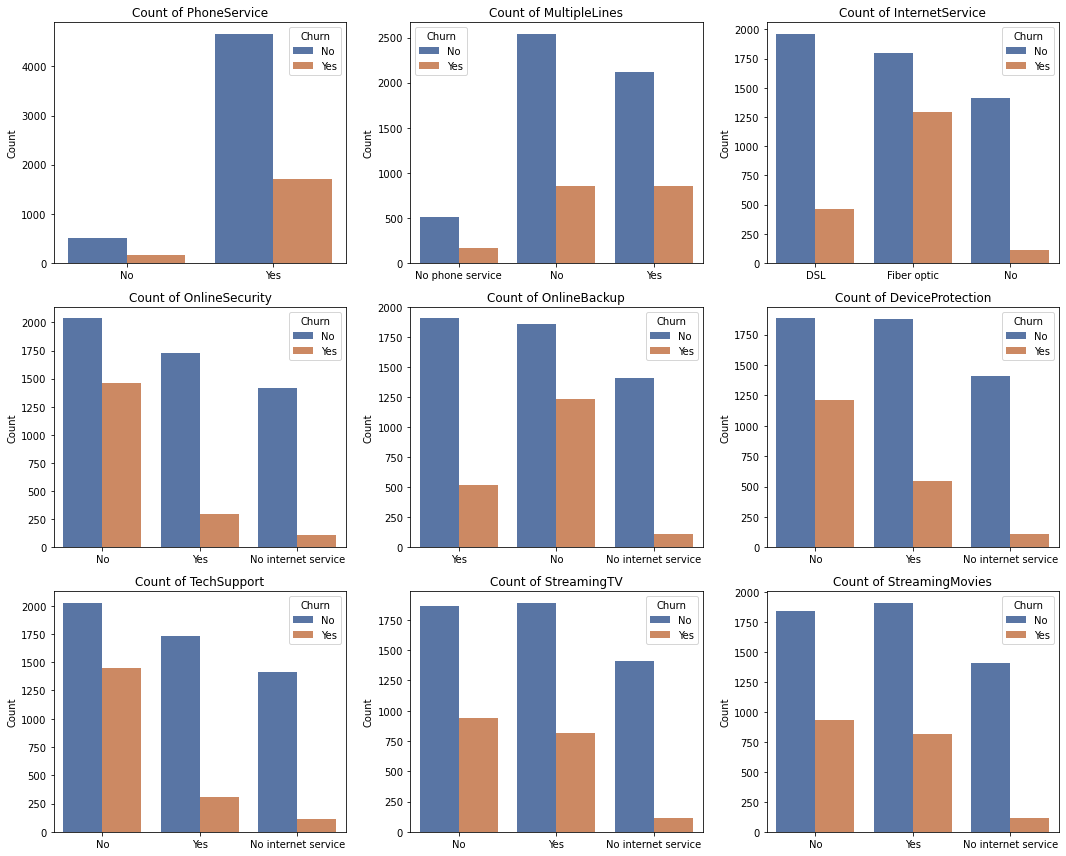

In [273]:
# List of categorical columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create a count plot for each
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="deep",hue = df['Churn'])
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")  # Remove x-axis label for cleaner look
    axes[i].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

# Churn is higher among Fiber Optic users, possibly due to cost or service dissatisfaction.
# Customers who lack security and tech support services tend to churn more.
# Multiple Lines & Streaming services do not significantly affect churn, suggesting other factors drive customer decisions.

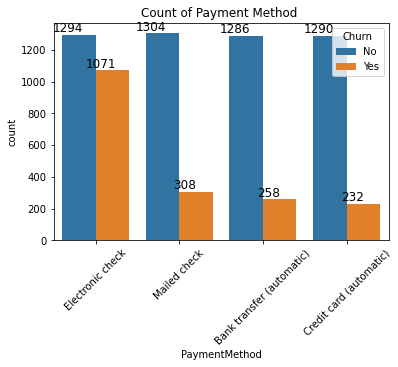

In [283]:
ax = sns.countplot(df["PaymentMethod"],data=df,hue='Churn')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 6, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')
plt.title("Count of Payment Method ")
plt.xticks(rotation = 45)
plt.show()

# Customer is likely to churn when he is using  electroic check as a payment method